In [1]:
import pandas as aju
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

## 3 STD DEV : HEIGHT CSV

In [2]:
df = aju.read_csv('./DATASET/FE_02_heights.csv')

In [3]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


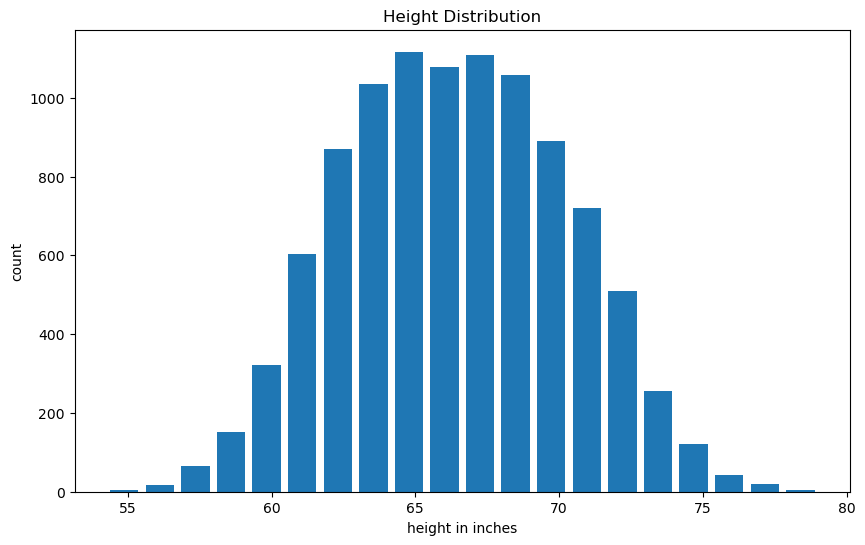

In [4]:
plt.hist(df.height,bins = 20,rwidth = 0.8)
plt.xlabel('height in inches')
plt.ylabel('count')
plt.title('Height Distribution')
plt.show()

The graph shows that the data is normally distributed

In [6]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [7]:
df.height.min()

54.26313333

In [8]:
df.height.max()

78.99874235

In [9]:
rng = np.arange(df.height.min(),df.height.max(),0.1)
rng

array([54.26313333, 54.36313333, 54.46313333, 54.56313333, 54.66313333,
       54.76313333, 54.86313333, 54.96313333, 55.06313333, 55.16313333,
       55.26313333, 55.36313333, 55.46313333, 55.56313333, 55.66313333,
       55.76313333, 55.86313333, 55.96313333, 56.06313333, 56.16313333,
       56.26313333, 56.36313333, 56.46313333, 56.56313333, 56.66313333,
       56.76313333, 56.86313333, 56.96313333, 57.06313333, 57.16313333,
       57.26313333, 57.36313333, 57.46313333, 57.56313333, 57.66313333,
       57.76313333, 57.86313333, 57.96313333, 58.06313333, 58.16313333,
       58.26313333, 58.36313333, 58.46313333, 58.56313333, 58.66313333,
       58.76313333, 58.86313333, 58.96313333, 59.06313333, 59.16313333,
       59.26313333, 59.36313333, 59.46313333, 59.56313333, 59.66313333,
       59.76313333, 59.86313333, 59.96313333, 60.06313333, 60.16313333,
       60.26313333, 60.36313333, 60.46313333, 60.56313333, 60.66313333,
       60.76313333, 60.86313333, 60.96313333, 61.06313333, 61.16

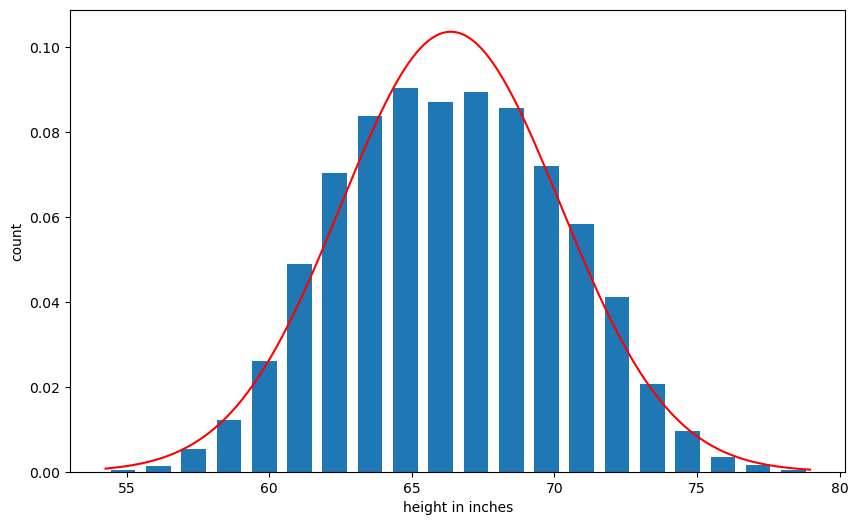

In [20]:
plt.hist(df.height,bins = 20,rwidth = 0.7,density = True)
plt.xlabel('height in inches')
plt.ylabel('count')

# Lets draw a curve and see
rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()),color = 'red')
plt.show()

In [22]:
print(df.height.mean(),"|",df.height.std())

66.367559754866 | 3.847528120795573


Lets use 3 standard Deviation

In [29]:
upper_limit = df.height.mean()+ 3* df.height.std()
upper_limit

77.91014411725271

In [31]:
lower_limit = df.height.mean()- 3* df.height.std()
lower_limit

54.824975392479274

In [33]:
df[(df.height > upper_limit)|(df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Some of the datapoints seems valid like female can be four feet..  
By discussion with business analyst you can hold them or remove.  
Now lets remove them and make a new dataframe

In [36]:
df1 = df[(df.height < upper_limit)&(df.height > lower_limit)]
df1

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


## ZSCORE : HEIGHT CSV

In [43]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [45]:
(73.847017 - df.height.mean())/ df.height.std()

1.9439642831219734

In [47]:
df[df.zscore > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [49]:
df[df.zscore < -3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [55]:
df[(df.zscore > 3)|(df.zscore < -3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [59]:
df2 = df[(df.zscore < 3)|(df.zscore > -3)]
df2

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
